In [1]:
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336) 

In [3]:
# data (as pandas dataframes) 
X = chronic_kidney_disease.data.features 
y = chronic_kidney_disease.data.targets  

In [4]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no


### 1. Classification Problem Identification: Define and describe a classification problem based on the dataset.

In [6]:
df=pd.concat([X,y],axis=1)

In [7]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


- Predict class, ckd or notckd using 25 features

### 2. Variable Transformation: Implement any transformations chosen or justify the absence of such modifications.

In [10]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [11]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [12]:
df['packed_cell_volume']

0      44.0
1      38.0
2      31.0
3      32.0
4      35.0
       ... 
395    47.0
396    54.0
397    49.0
398    51.0
399    53.0
Name: packed_cell_volume, Length: 400, dtype: float64

In [13]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

- As we can see that 'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.

### 3. Dataset Overview: Provide a detailed description of the dataset, covering variables, sum-maries, observation counts, data types, and distributions (at least three statements).

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [15]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


### 4.Association Between Variables: Analyze variable relationships and their implications for feature selection or extraction (at least three statements).

- It can be found that there are some highly correlated feature variables, such as: haemoglobin and specific_gravity, packed_cell_volume and red_blood_cell_count

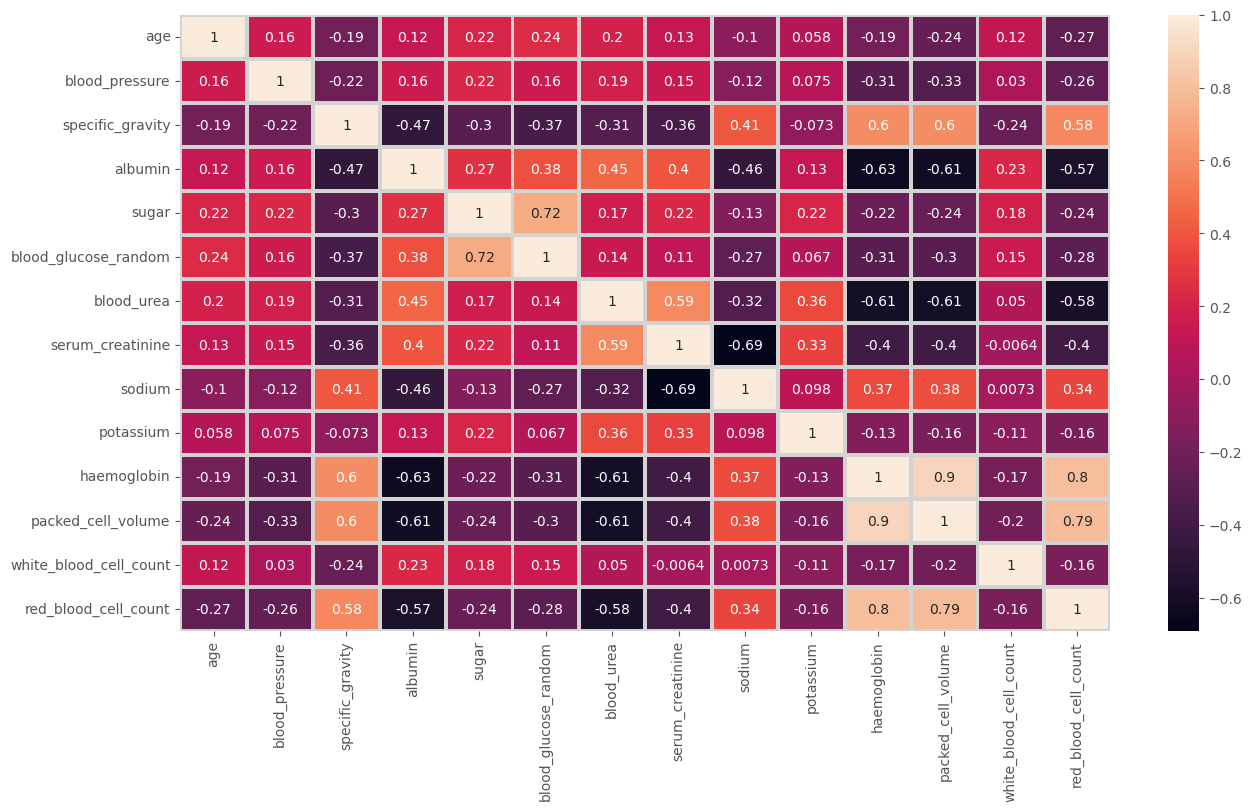

In [16]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

1. There is a certain degree of positive correlation between age (age) and blood pressure (blood_pressure), with a correlation coefficient of 0.159480.
2. There is a certain degree of negative correlation between specific gravity (specific_gravity) and albumin (albumin), with a correlation coefficient of -0.469760.
3. There is a certain degree of negative correlation between specific gravity (specific_gravity) and blood sugar (sugar), with a correlation coefficient of -0.296234.
4. There is a certain degree of positive correlation between blood sugar (sugar) and blood sugar random value (blood_glucose_random), with a correlation coefficient of 0.717827.
5. There is a certain degree of positive correlation between blood glucose random value (blood_glucose_random) and blood urea (blood_urea), with a correlation coefficient of 0.143322.
6. There is a certain degree of positive correlation between blood urea (blood_urea) and serum creatinine (serum_creatinine), with a correlation coefficient of 0.586368.
7. There is a certain degree of negative correlation between serum creatinine (serum_creatinine) and sodium (sodium), with a correlation coefficient of -0.690158.
8. There is a certain degree of negative correlation between serum creatinine (serum_creatinine) and hemoglobin (haemoglobin), with a correlation coefficient of -0.401670.
9. There is a certain degree of positive correlation between sodium (sodium) and hemoglobin (haemoglobin), with a correlation coefficient of 0.365183.


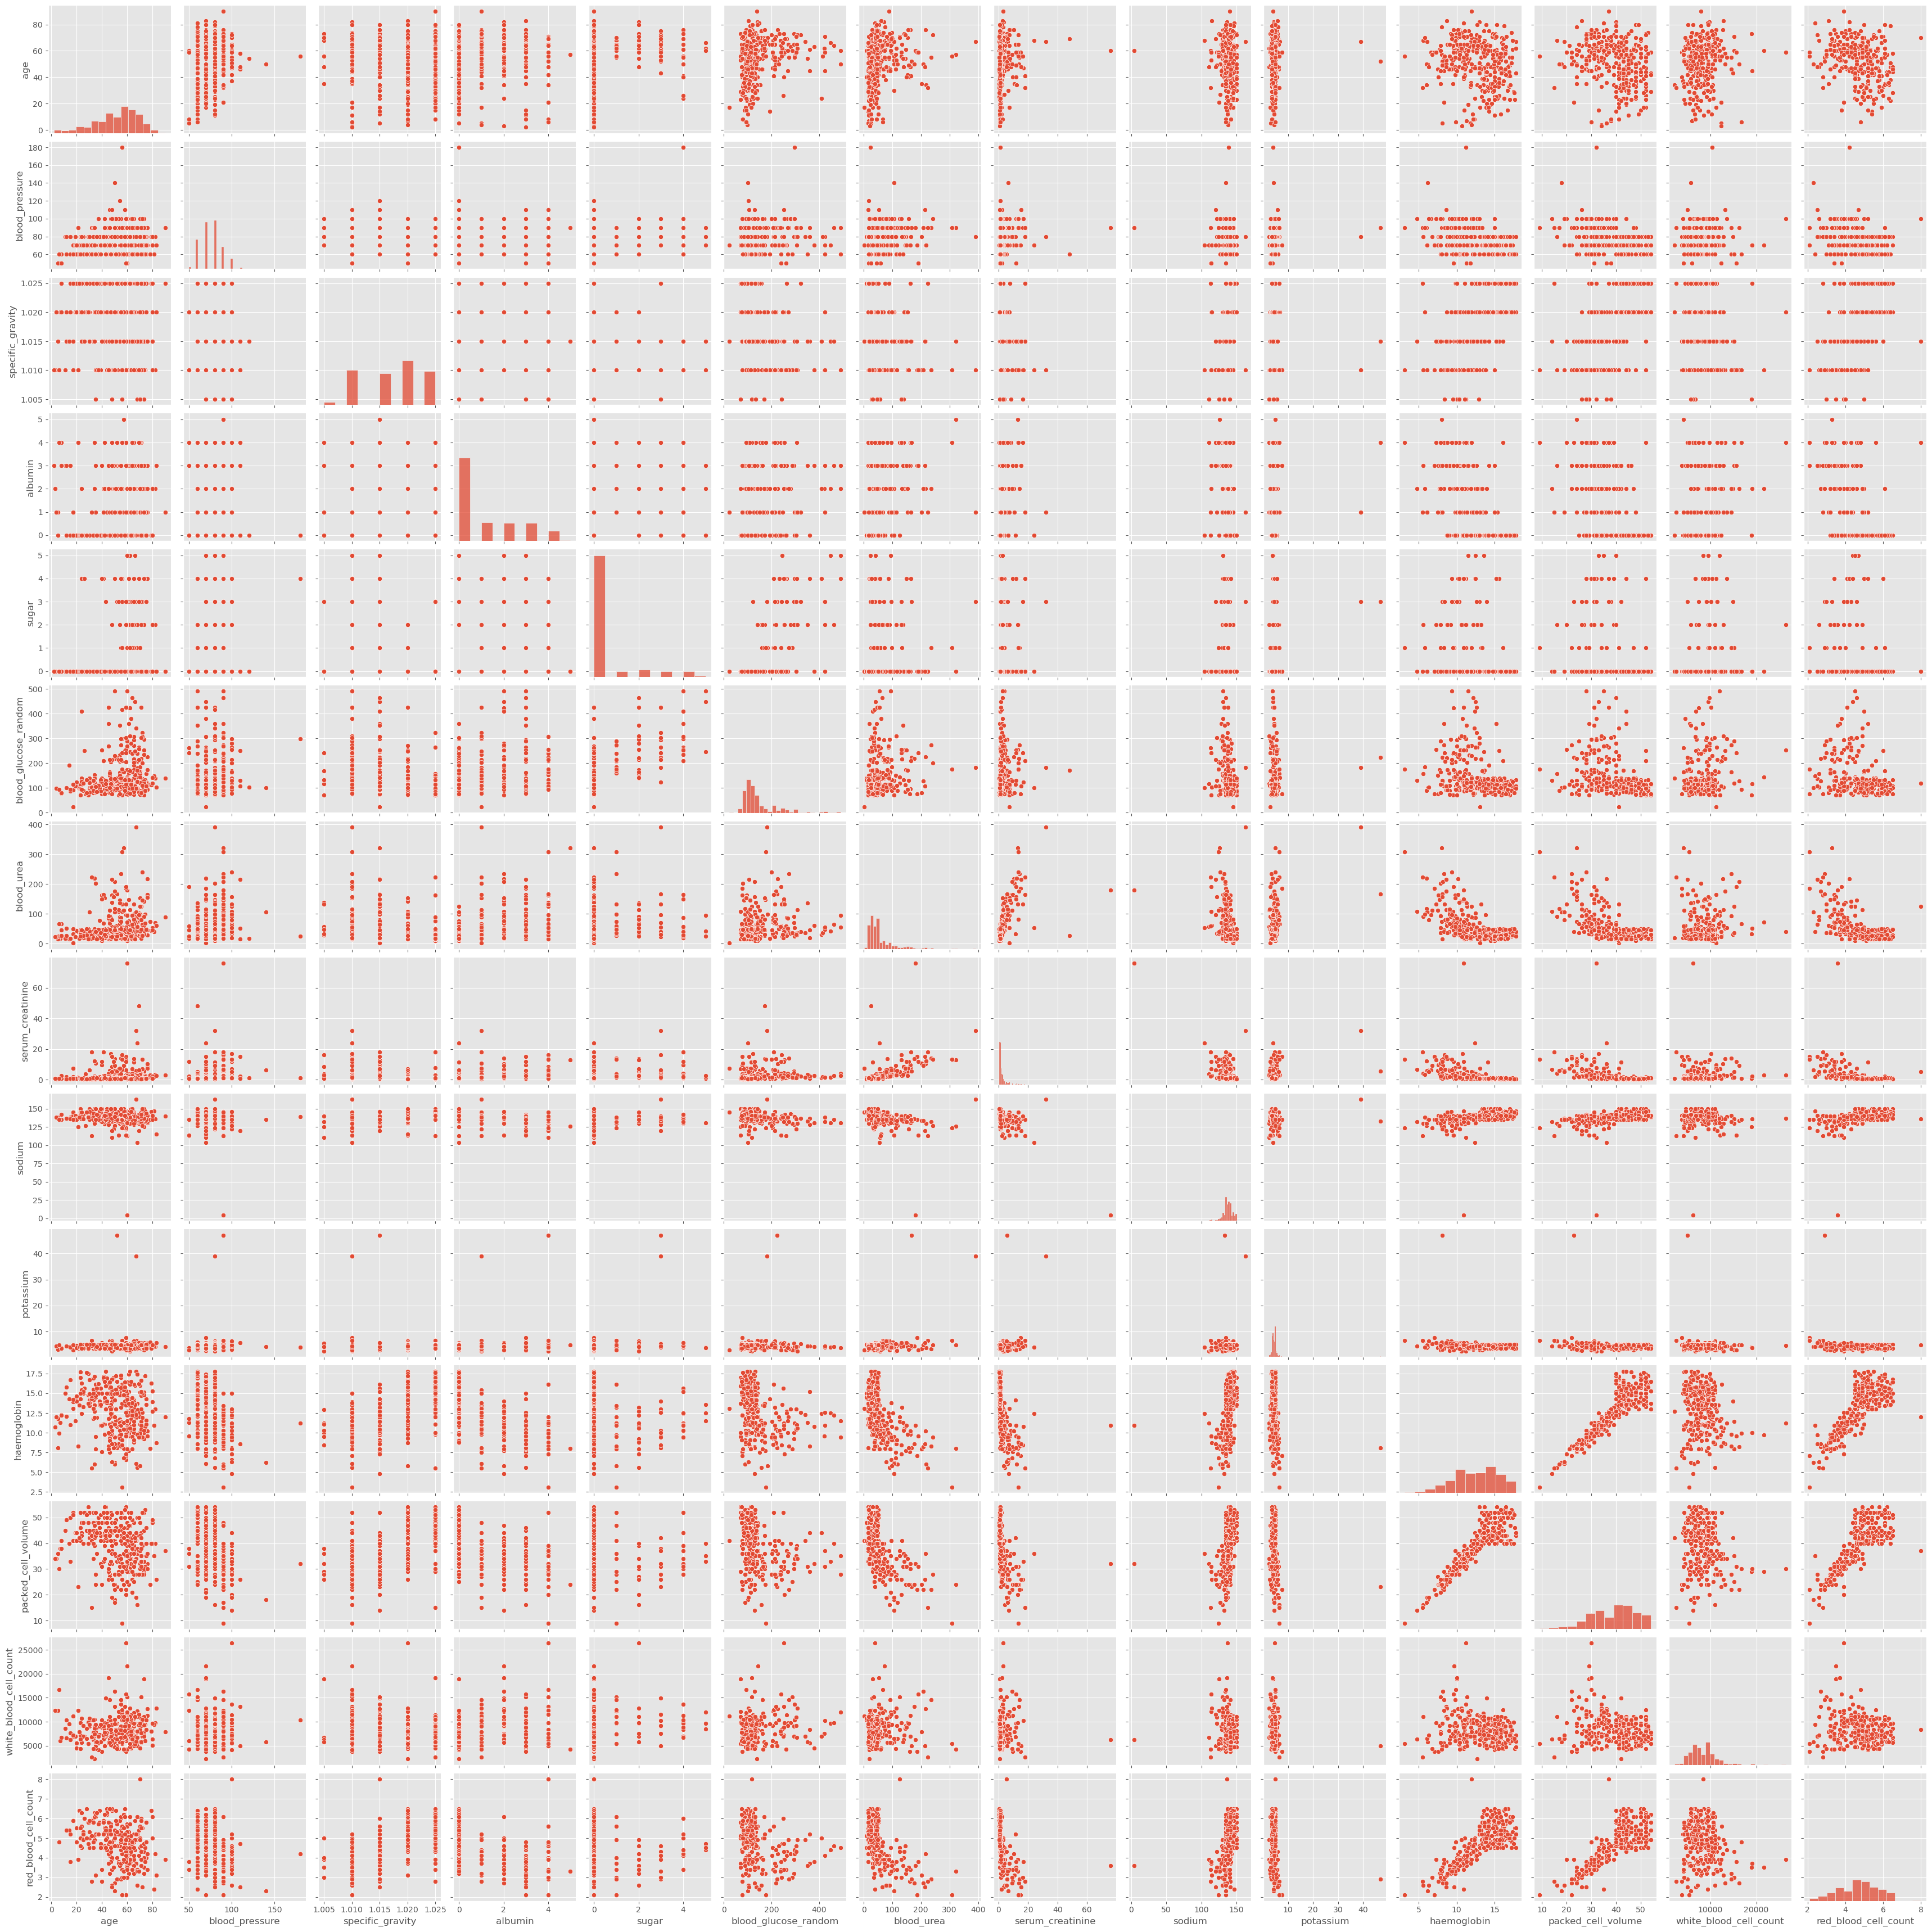

In [41]:
sns.pairplot(df)
plt.show()

### 5. Missing Value Analysis and Handling

In [18]:
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [25]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [26]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [27]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            4
bacteria                   4
hypertension               2
diabetes_mellitus          2
coronary_artery_disease    2
appetite                   1
peda_edema                 1
aanemia                    1
class                      0
dtype: int64

In [28]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [29]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [30]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [31]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')
for col in cat_cols:
    impute_mode(col)

In [32]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

- All the missing values are handeled now

### 6. Outlier Analysis

In [33]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has ['abnormal' 'normal'] values

pus_cell has ['normal' 'abnormal'] values

pus_cell_clumps has ['notpresent' 'present'] values

bacteria has ['notpresent' 'present'] values

hypertension has ['yes' 'no'] values

diabetes_mellitus has ['yes' 'no' '\tno'] values

coronary_artery_disease has ['no' 'yes'] values

appetite has ['good' 'poor'] values

peda_edema has ['no' 'yes'] values

aanemia has ['no' 'yes'] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [34]:
# replace incorrect values

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [35]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [36]:


cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")



diabetes_mellitus has ['yes' 'no'] values

coronary_artery_disease has ['no' 'yes'] values

class has [0 1] values



### 7. Sub-group Analysis

In [37]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

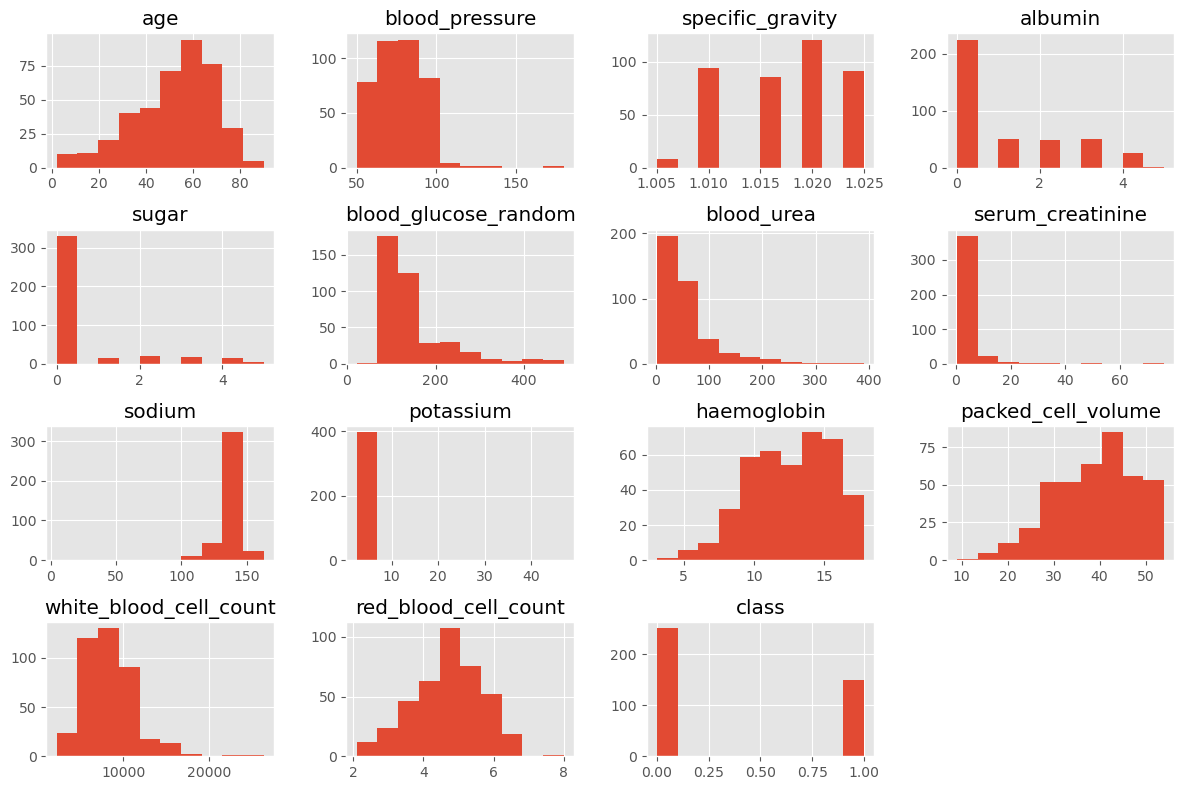

In [38]:
df.hist(figsize = (12, 8))
plt.tight_layout()
plt.show()

In [39]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



- Potential grouping: For example, it can be divided into two groups based on red_blood_cells, and it can be divided into age groups above 60 and age groups below 60 based on age.

- As all of the categorical columns have 2 categories we can use label encoder

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

### 8. Data Splitting

In [41]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [42]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

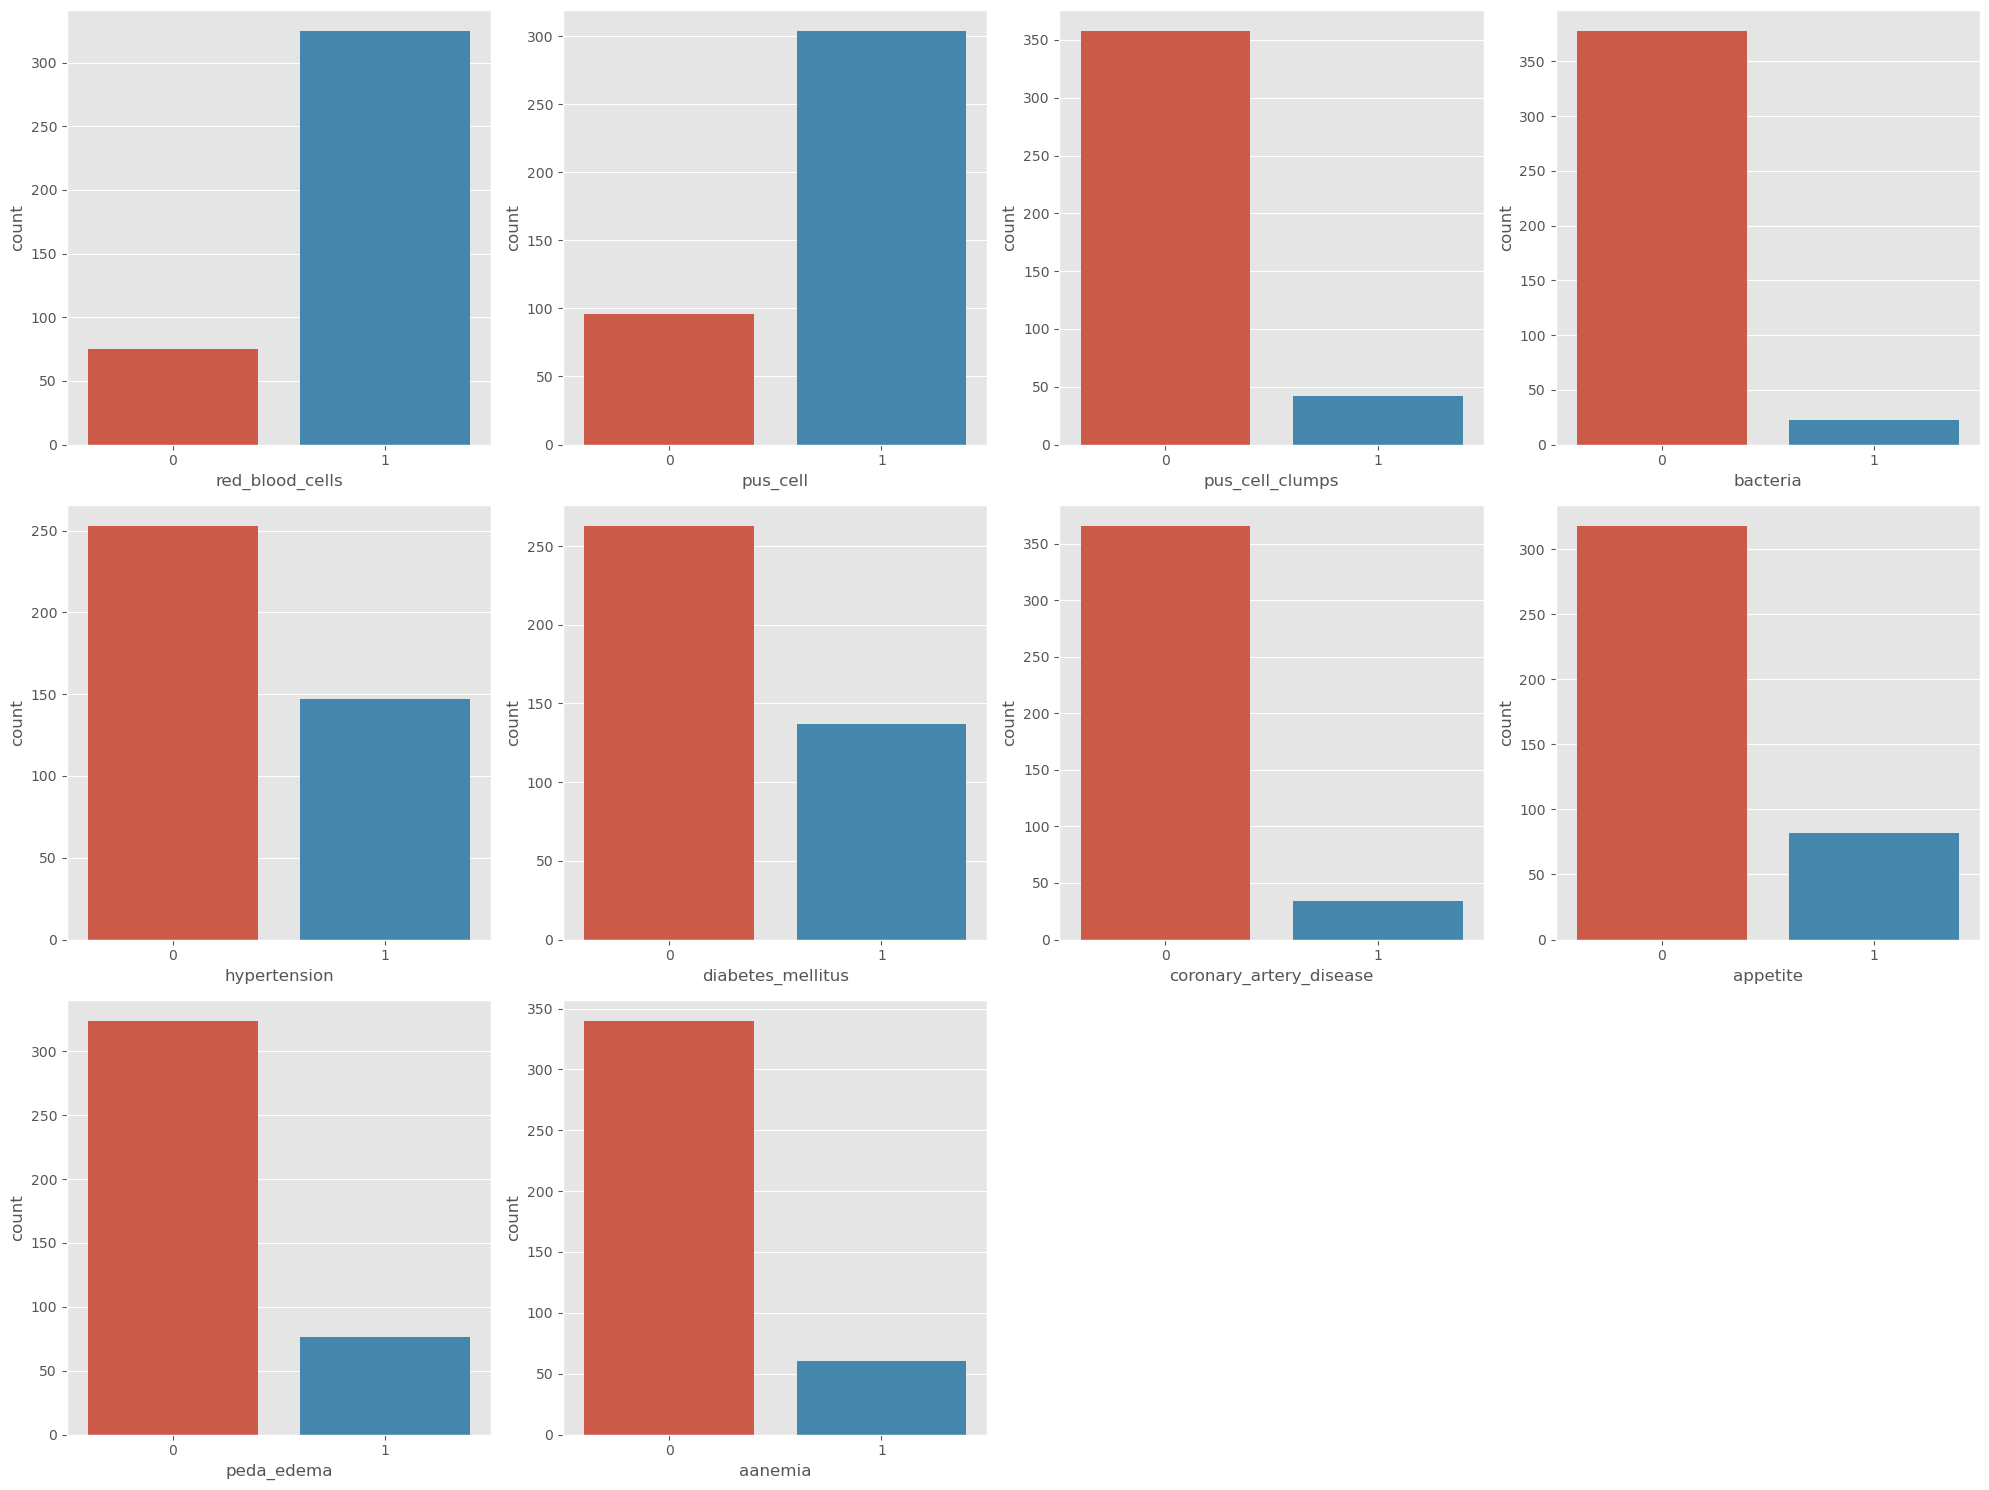

In [43]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data=df,x=column)
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

### 9. Classifier Choices

- I will use random forest and KNN model for prediction of CKD patients

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

RandomForestClassifier()

In [48]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### 10. Performance Metrics

- Random Forest Classifier

In [49]:


# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rd_clf.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.975 

Confusion Matrix :- 
[[70  0]
 [ 3 47]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        70
           1       1.00      0.94      0.97        50

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



- KNN

### 11. Feature Selection/Extraction

In [50]:
# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.8
Test Accuracy of KNN is 0.65 

Confusion Matrix :- 
[[48 22]
 [20 30]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.71      0.69      0.70        70
           1       0.58      0.60      0.59        50

    accuracy                           0.65       120
   macro avg       0.64      0.64      0.64       120
weighted avg       0.65      0.65      0.65       120



### 12. Classifier Comparison

In [54]:


models = pd.DataFrame({
    'Model' : [ 'KNN', 'KNN with feature selection','Random Forest Classifier'],
    'Score' : [knn_acc, knn_acc_fs, rd_clf_acc]
})


models.sort_values(by = 'Score', ascending = False)



,Model,Score
2,Random Forest Classifier,0.975000
1,KNN with feature selection,0.941667
0,KNN,0.650000


- 1. The accuracy of random forest is 0.975, while the accuracy of KNN is only 0.65.
- 2. The accuracy of the KNN model before feature selection is only 0.65, and the accuracy of the KNN model after feature selection is 0.9416. Therefore, after feature selection, the accuracy of the model is higher.

### 13. Interpretable Classifier Insight

In [56]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Feature selection using SelectKBest with f_classif
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)


# KNN with feature selection and scaling
knn = KNeighborsClassifier()
knn.fit(X_train_selected, y_train)

# Accuracy score, confusion matrix, and classification report of KNN with feature selection
knn_acc_fs = accuracy_score(y_test, knn.predict(X_test_selected))

print(f"Training Accuracy of KNN with feature selection is {accuracy_score(y_train, knn.predict(X_train_selected))}")
print(f"Test Accuracy of KNN with feature selection is {knn_acc_fs} \n")

print(f"Confusion Matrix with feature selection :- \n{confusion_matrix(y_test, knn.predict(X_test_selected))}\n")
print(f"Classification Report with feature selection :- \n {classification_report(y_test, knn.predict(X_test_selected))}")


Training Accuracy of KNN with feature selection is 0.9357142857142857
Test Accuracy of KNN with feature selection is 0.9416666666666667 

Confusion Matrix with feature selection :- 
[[65  5]
 [ 2 48]]

Classification Report with feature selection :- 
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        70
           1       0.91      0.96      0.93        50

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



- 1. After re-training the interpretable classifier with all available data, the analysis reveals that age and blood pressure are significant predictor variables in the context of the data and the challenge. The positive correlation coefficient of 0.159480 suggests that age has a slight positive influence on blood pressure. This finding implies that as individuals get older, their blood pressure tends to increase to some extent.

- 2. Another significant predictor variable identified is the specific gravity. The negative correlation coefficient of -0.469760 indicates an inverse relationship between specific gravity and albumin, meaning that as specific gravity decreases, the albumin levels tend to increase. This finding is valuable in understanding the impact of specific gravity on albumin levels and can provide insights into potential kidney-related conditions or disorders.

